  <tr>
        <td>
            <div align="left">
                <font size=25px>
                    <b>Medical Insurance Prediction
                    </b>
                </font>
            </div>
        </td>
    </tr>

https://colab.research.google.com/drive/1cXN9QZwmi4G3TCsmGxTijIKYWw_rf1aX?usp=sharing

## Problem Statement
Insurance dataset comes from the book Machine Learning with R by Brett Lantz. The data contains medical information and costs billed by health insurance companies. The data has been cleaned to match the formatting of the textbook, so it can be assessed as credible and accurate.

The data allows investigation into the factors that affect the amount that an individual spends on health insurance. For insurance companies, the cost of cover usually relates to the risk associated with a payout and the amount they would be liable to pay in the event of a payout. For health insurance specifically, the risk is likely to be higher if an individual is more likely to require medical assistance i.e. they are in worse overall health. In terms of the payout, companies often offer levels of cover based on the quality of care a patient would receive in the event they require medical attention.

In this case, several Machine Learning Regression models can be applied on the dataset, compare the performance of the models & select the model which can predict the medical insurance charges most accurately.

## Data
The dataset consists of 1338 observations and 7 variables:
1. age: age of primary beneficiary
2. sex: insurance contractor gender, female, male
3. bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
4. children: Number of children covered by health insurance / Number of dependents
5. smoker: Smoking status of insurance claimer
6. region: the beneficiary’s residential area in the US, northeast, southeast, southwest, northwest.
7. charges: Individual medical costs billed by health insurance

## Content

1. **[Import Libraries](#import_packages)**
2. **[Read the Data](#read_data)**
3. **[Understanding the Data](#understand_data)**
    - 3.1 - [Data types & Dimensions](#dimesnsions)
    - 3.2 - [Checking for null values](#check_null)
    - 3.3 - [Statistical Summary](#summary)
4. **[Exploratory Data Analysis (EDA)](#eda)**
    - 4.1 - [Age-wise smoker charges Distribution](#distribution1)
    - 4.2 - [Age-wise bmi & charges Distribution](#distribution2)
    - 4.3 - [Region vs BMI Distribution](#distribution3)
    - 4.4 - [Gender-wise BMI Distribution](#distribution4)
    - 4.5 - [Gender-wise Smoker Distribution](#distribution5)
    - 4.6 - [Smoker vs no. of children Distribution](#distribution6)
    - 4.7 - [Correlation](#correlation)
5. **[Data Pre-processing](#data_preprocess)**
    - 5.1 - [Label Encoding](#label_encode)
    - 5.2 - [Normalize the data](#normalize_data)
    - 5.3 - [Splitting the data into training & testing set](#split_data)
6. **[Modeling & Prediction](#modeling_predict)**
    - 6.1 - [Linear Regression](#linear)
    - 6.2 - [Random Forest Regressor](#rf)
    - 6.3 - [Bayesian Ridge](#bayesian)
    - 6.4 - [Support Vector Regression](#svr)
    - 6.5 - [SGD Regressor](#sgd)
7. **[Model Comparison](#model_compare)**

In [1]:
pip install scikit-learn-intelex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 7.3 MB/s 
     |████████████████████████████████| 22.5 MB 1.4 MB/s 
     |████████████████████████████████| 284.3 MB 2.1 kB/s 
     |████████████████████████████████| 4.0 MB 59.9 MB/s 


<a name='import_packages'></a>
### 1. Import Libraries

In [1]:
# For ML models
from sklearn.linear_model import LinearRegression, BayesianRidge, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

# For Data Processing
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split 

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Miscellaneous
import os
import random
import math

#Speeding up training
from sklearnex import patch_sklearn
patch_sklearn()

import warnings
warnings.filterwarnings("ignore")

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


<a name='read_data'></a>
### 2. Read the Data

In [2]:
medical_df = pd.read_csv('/content/insurance.csv')

In [3]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<a name='understand_data'></a>
### 3. Understanding the Data

<a name='dimensions'></a>
**3.1. Data types & Dimensions**

In [4]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
medical_df.shape

(1338, 7)

<a name='check_null'></a>
**3.2. Checking for missing values**

In [6]:
medical_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<a name='summary'></a>
**3.3. Statistical Summary**

In [7]:
medical_df.describe().T.style.background_gradient(cmap=sns.light_palette("#ea4335", as_cmap=True), axis=1)

,count,mean,std,min,25%,50%,75%,max
age,1338.000000,39.207025,14.049960,18.000000,27.000000,39.000000,51.000000,64.000000
bmi,1338.000000,30.663397,6.098187,15.960000,26.296250,30.400000,34.693750,53.130000
children,1338.000000,1.094918,1.205493,0.000000,0.000000,1.000000,2.000000,5.000000
charges,1338.000000,13270.422265,12110.011237,1121.873900,4740.287150,9382.033000,16639.912515,63770.428010


In [8]:
fig = make_subplots(
    rows=1, cols=3, subplot_titles=("sex", "smoker", "region"),
    specs=[[{"type": "domain"}, {"type": "domain"}, {"type": "domain"}]],
)

colours = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']

fig.add_trace(go.Pie(labels=np.array(medical_df['sex'].value_counts().index),
                     values=[x for x in medical_df['sex'].value_counts()],
                     textinfo='label+percent', rotation=-45, hole=.35,
                     marker_colors=colours), row=1, col=1)

fig.add_trace(go.Pie(labels=np.array(medical_df['smoker'].value_counts().index),
                     values=[x for x in medical_df['smoker'].value_counts()],
                     textinfo='label+percent', hole=.35,
                     marker_colors=colours), row=1, col=2)

fig.add_trace(go.Pie(labels=np.array(medical_df['region'].value_counts().index),
                     values=[x for x in medical_df['region'].value_counts()],
                     textinfo='label+percent', rotation=-45, hole=.35,
                     marker_colors=colours), row=1, col=3)


fig.update_layout(height=450, font=dict(size=14), showlegend=False)
fig.show()

<a name='eda'></a>
### 4. Exploratory Data Analysis (EDA)

<a name='distribution1'></a>
**4.1. Age-wise smoker charges Distribution**

In [9]:
fig = px.scatter(medical_df, x="charges", y="age", color='smoker', color_continuous_scale='Blues', color_discrete_map={'yes':'#ea4335', 'no':'#4285f4'})
fig.update_layout(legend_title_text='Smoker')

- Individuals who smoke have a higher medical bill than individuals who do not smoke

<a name='distribution2'></a>
**4.2. Age-wise bmi & charges Distribution**

In [10]:
fig = px.scatter(medical_df, x="bmi", y="charges", color='age', color_continuous_scale='RdBu')
fig.show()

- Charges has a strong correlation with age
- The correlation of charge and age is linear

<a name='distribution3'></a>
**4.3. Region vs BMI Distribution**

In [11]:
fig = go.Figure()
colors = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
for i,x in enumerate(medical_df['region'].unique()):
    fig.add_trace(go.Box(
        x=medical_df[medical_df['region']==x]['bmi'],
        y=medical_df[medical_df['region']==x]['region'], name=x, marker_color=colors[i]
    ))

fig.update_layout(yaxis_title='region', xaxis_title='bmi')

fig.update_traces(orientation='h')
fig.update_layout(legend_title_text='region')
fig.show()

- Southeastern people have the highest bmi, a median bmi of 53.13
- Northeastern people have the lowest bmi, a median bmi of 15.96

<a name='distribution4'></a>
**4.4. Gender-wise BMI Distribution**

In [12]:
fig = px.histogram(medical_df, x="bmi", color="sex", marginal='box', nbins=80, color_discrete_map = {'male':'#ea4335','female':'#4285f4'})
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.75)
fig.show()

- The bmi of a person is independent of their gender

<a name='distribution5'></a>
**4.5. Gender-wise smoker Distribution**

In [13]:
fig = px.histogram(medical_df, x="sex", color='smoker', color_discrete_map = {'yes':'#ea4335','no':'#4285f4'})
fig.show()

- Looks like people smoke regardless of their gender
- More male beneficiaries seem to be smokers than female beneficiaries, but the difference is minimal, also the number of female beneficiaries tested are slightly less than the number of male beneficiaries
- It cannot be concluded that more males smoke because we do not have sufficient data

<a name='distribution6'></a>
**4.6. Smoker vs no. of children Distribution**

In [14]:
fig = px.histogram(medical_df, x="children", color='smoker', barmode='group', color_discrete_map = {'yes':'#ea4335','no':'#4285f4'})
fig.show()

- The above graph shows that the Smokers usually have less children than non-smokers

<a name='correlation'></a>
**4.7. Correlation**

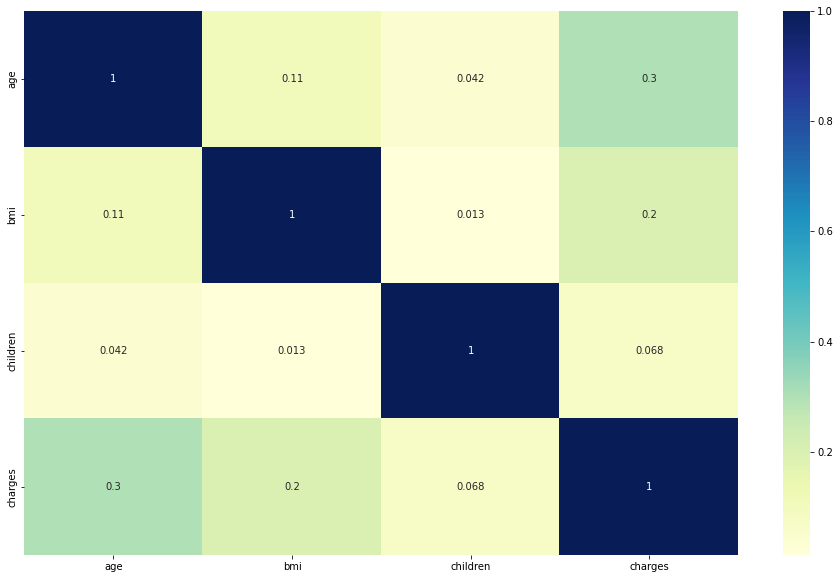

In [15]:
plt.figure(figsize=(16, 10))
sns.heatmap(medical_df.corr(), annot=True, cmap="YlGnBu")
plt.show()

- No correlation between independent variables
- Age and charges show some correlation between them

<a name='data_preprocess'></a>
### 5. Data Pre-processing

<a name='label_encode'></a>
**5.1. Label Encoding**

In [16]:
print('Categorical Columns: ')
medical_df.select_dtypes(include=['O']).nunique()

Categorical Columns: 


sex       2
smoker    2
region    4
dtype: int64

In [17]:
# Integer encode columns with 2 unique values
for col in ['sex', 'smoker']:
    le = LabelEncoder()
    medical_df[col] = le.fit_transform(medical_df[col])

# Dummy encode columns with more than 2 unique values
medical_df1 = pd.get_dummies(medical_df, columns=['region'], prefix = ['region'])
medical_df1.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


<a name='normalize_data'></a>
**5.2. Normalize the data**

In [18]:
scaler = MinMaxScaler()
num_vars = ["age", "bmi", "children", "charges"]

medical_df1[num_vars] = scaler.fit_transform(medical_df1[num_vars])
medical_df1.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,0,0.321227,0.0,1,0.251611,0,0,0,1
1,0.000000,1,0.479150,0.2,0,0.009636,0,0,1,0
2,0.217391,1,0.458434,0.6,0,0.053115,0,0,1,0
3,0.326087,1,0.181464,0.0,0,0.333010,0,1,0,0
4,0.304348,1,0.347592,0.0,0,0.043816,0,1,0,0


<a name='split_data'></a>
**5.3. Splitting the data into training & testing set**

In [19]:
features = medical_df1.drop('charges', axis=1)
labels = medical_df1['charges']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)

print("Features train shape: ", X_train.shape)
print("Label train shape: ", y_train.shape)

print("Features test shape: ", X_test.shape)
print("Label test shape: ", y_test.shape)

Features train shape:  (1070, 9)
Label train shape:  (1070,)
Features test shape:  (268, 9)
Label test shape:  (268,)


<a name='modeling_predict'></a>
### 6. Modeling & Prediction

In [20]:
result = {}

<a name='linear'></a>
**6.1. Linear Regression**

Linear Regressiom is a linear approximation of casual relationship between two
or more variables. This form of analysis estimates the coefficients of the linear
equation, involving one or more independent variables (features/predictors) that
best predict the value of the target variable.

In [21]:
lr = LinearRegression()

parameters = {'normalize': [True, False]}
linear_reg = GridSearchCV(lr, parameters)
print("Searching for best hyperparameters ...")
linear_reg.fit(X_train, y_train)
print(f'Best Hyperparameters: {linear_reg.best_params_}')

y_pred =linear_reg.predict(X_test)

rmse = math.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('\nRMSE:', rmse)
print('R2 Score:', r2)

result['LinearRegression'] = [rmse, r2]

Searching for best hyperparameters ...
Best Hyperparameters: {'normalize': False}

RMSE: 0.09004589960989245
R2 Score: 0.8000147215669169


<a name='rf'></a>
**6.2. Random Forest Regressor**

Random Forest Regressor is an ensemble technique capable of performing both
regression and classification tasks with the use of multiple decision trees and a
technique called Bootstrap and Aggregation, commonly known as bagging.

In [22]:
rf = RandomForestRegressor()

parameters = {'n_estimators': [160, 180, 200, 220], 'max_depth':[16, 18, 20, 22, 24]}
random_forest = GridSearchCV(rf, parameters)
print("Searching for best hyperparameters ...")
random_forest.fit(X_train, y_train)
print(f'Best Hyperparameters: {random_forest.best_params_}')

y_pred = random_forest.predict(X_test)

rmse = math.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test, y_pred)

print('\nRMSE:', rmse)
print('R2 Score:', r2)

result['RandomForestRegressor'] = [rmse, r2]

Searching for best hyperparameters ...
Best Hyperparameters: {'max_depth': 24, 'n_estimators': 160}

RMSE: 0.0693771832988239
R2 Score: 0.8812855809326111


<a name='bayesian'></a>
**6.3. Bayesian Ridge**

Bayesian Ridge allows a natural mechanism to survive insufficient data or poorly
distributed data by formulating linear regression using probability distributors
rather than point estimates. The output or response is assumed to drawn from a
probability distribution rather than estimated as a single value.

In [23]:
bayes_ridge = BayesianRidge().fit(X_train, y_train)

y_pred = bayes_ridge.predict(X_test)

rmse = math.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test, y_pred)

print('\nRMSE:', rmse)
print('R2 Score:', r2)

result['BayesianRidge'] = [rmse, r2]


RMSE: 0.09009739805756757
R2 Score: 0.7997859076733418


<a name='svr'></a>
**6.4. Support Vector Regression**

It is a supervised learning algorithm that is used to
predict discrete values. Support Vector Regression uses the same principle as the SVMs. The basic idea behind SVR is to find the best fit line. In SVR, the best fit
line is the hyperplane that has the maximum number of points.

In [24]:
svr = SVR()

parameters = {'kernel': ['linear', 'rbf', 'polynomial'], 'C': [.1, .3, .5, .7, .9, 1]}
SV_reg = GridSearchCV(svr, parameters)
print("Searching for best hyperparameters ...")
SV_reg.fit(X_train, y_train)
print(f'Best Hyperparameters: {SV_reg.best_params_}')

y_pred = SV_reg.predict(X_test)

rmse = math.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('\nRMSE:', rmse)
print('R2 Score:', r2)

result['SupportVectorRegression'] = [rmse, r2]

Searching for best hyperparameters ...
Best Hyperparameters: {'C': 0.1, 'kernel': 'linear'}

RMSE: 0.09261781698442031
R2 Score: 0.7884274963946323


<a name='sgd'></a>
**6.5. SGD Regressor**

SGD is a simple yet efficient optimization algorithm used to find
the values of parameters/coefficients of functions that minimize a cost function.
SGD regressor basically implements a plain SGD learning routine supporting
various loss functions and penalties on loss function to shrink the model parameters
to fit linear regression models.

In [25]:
sgdr = SGDRegressor()

parameters = {'loss': [ 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'], 'alpha': [0.0001, 0.001, 0.01, 0.1]}
sgd_reg = GridSearchCV(sgdr, parameters)
print("Searching for best hyperparameters ...")
sgd_reg.fit(X_train, y_train)
print(f'Best Hyperparameters: {sgd_reg.best_params_}')

y_pred = sgd_reg.predict(X_test)

rmse = math.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('\nRMSE:', rmse)
print('R2 Score:', r2)

result['SGDRegressor'] = [rmse, r2]

Searching for best hyperparameters ...
Best Hyperparameters: {'alpha': 0.0001, 'loss': 'squared_error'}

RMSE: 0.10165937397150858
R2 Score: 0.7451028343408941


<a name='model_compare'></a>
### 7. Model Comparison

- R-Squared Score – how much better our regression line is
than a simple horizontal line through the mean of the data. Closer to 1 better the model.
- Root
Mean Squared Error (RMSE) – gives an absolute number on how much you predicted results
deviate from the actual values. The lower the RMSE, the better a given model is able to “fit” a
dataset.

In [26]:
result_tabulation = pd.DataFrame.from_dict(result).T
result_tabulation.columns = ['Root Mean Squared Error', 'R-Squared Score']
result_tabulation = result_tabulation.sort_values('R-Squared Score', ascending=True)

result_tabulation.style.background_gradient(cmap=sns.light_palette("#ea4335", as_cmap=True))

,Mean Squared Error,R-Squared Score
SGDRegressor,0.101659,0.745103
SupportVectorRegression,0.092618,0.788427
BayesianRidge,0.090097,0.799786
LinearRegression,0.090046,0.800015
RandomForestRegressor,0.069377,0.881286


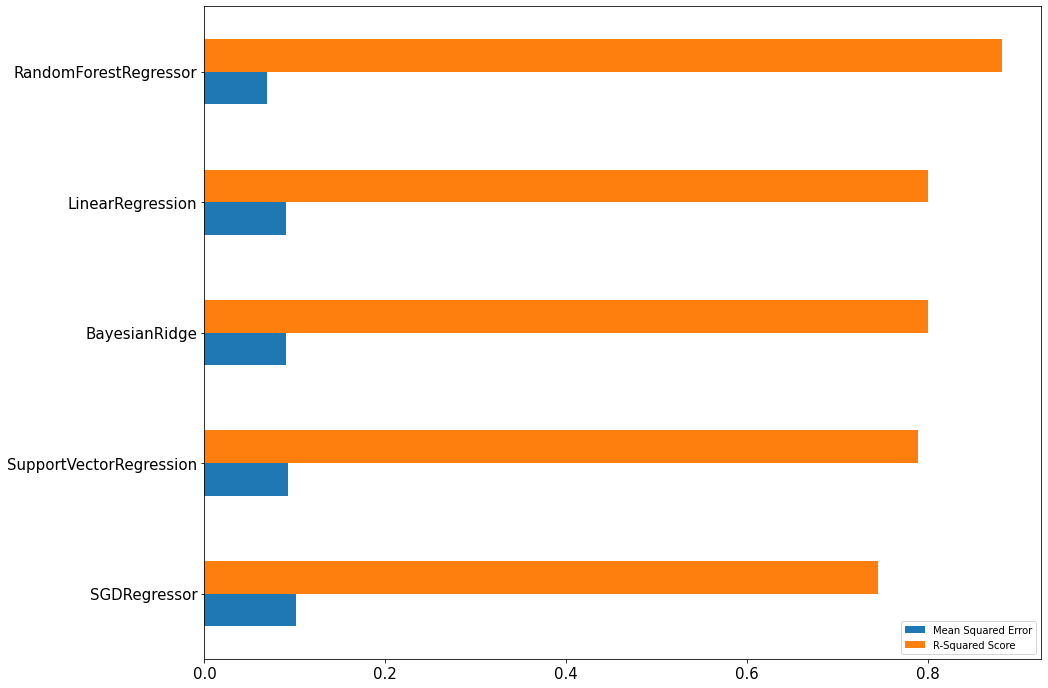

In [27]:
result_tabulation.plot.barh(figsize=(15, 12), fontsize=15)
plt.legend(loc='best')
plt.show()

From the above results, we can conclude that the Random Forest Regressor has better R-Squared Score & the least Root Mean Squared Error (RMSE) i.e. better perfomance as compared to Linear Regression, Bayesian Ridge, Support Vector Regression & SGD Regressor. 